# Projetos de ciência de dados com Python

## Capítulo 2, Exploração e limpeza de dados

### Objetivos

- Exercício 8: Regressão linear com o *scikit-learn*

- Exercício 9: Calculando as taxas de verdadeiros e falsos positivos e negativos e a matriz de confusão em Python

- Exercício 10: Obtendo probabilidades previstas a partir de um modelo de regressão logística

- Atividade 2: Executando a regressão logística com uma nova características e criando uma curva precision-recall

---

### Gerando dados sintéticos

Para começar, usaremos o *NumPy* para criar um array unidimensional de valores de características chamado *X* e composto de 1.000 números reais aleatórios (em outras palavras, não só inteiros como também decimais) entre 0 e 10. Empregaremos um **seed** pára o gerador de números aleatórios. Em seguida, usaremos *numpy.random.uniform*, que se baseia na distribuição uniforme: é igualmente provável que selecione qualquer número entre *low* (inclusive) e *high* (sem incluí-lo); ele retornará um array com o tamanho (*size*) que você especificar. Criaremos um array unidimensional (isto é, um vetor) com 1.000 elementos e depois examinaremos os 10 primeiros. Tudo isso pode ser feito com o uso do código a seguir:

In [1]:
import numpy as np

np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

Agora precisamos de uma variável resposta. Para esse exemplo, geraremos dados que se baseiam nas suposições da regressão linear: obedecem a uma tendência linear, mas tem erros normalmente distribuídos. É improvável que um dataset do mundo real atenda às suposições estatísticas formais de um modelo como esse, mas você pode criar um conjunto de dados sintéticos que o faça. Teoricamente, a regressão linear só deve ser usada para modelar dados em que a resposta seja uma transformação linear das características, com ruido normalmente distribuído (também chamado de gaussiano):

$$y = ax + b + N(\mu, \sigma)$$

Aqui, $a$ é a inclinação, $b$ é a interceptação, e o ruído gaussiano tem média igual a $\mu$ com desvio padrão de $\sigma$. Para escrever um código que implemente isso, temos de criar um vetor de respostas correspondente, $y$, calculado como a inclinação vezes o array de características, *X*, mais algum ruído gaussiano, e uma interceptação.

Para criar os dados da regressão linear, primeiro definiremos o seed aleatório. Em seguida, declararemos variáveis para a inclinação e a interceptação de nossos dados lineares. Para concluir, criaremos a variável de resposta usando a equação familiar de uma linha, com o acréscimo de algum ruído gaussiano: um array de 1.000 pontos de dados com a mesma dimensão (*size*) do array de características, *X*, em que a média do ruído (*loc*) é 0 e o desvio padrão (*scale*) é 1. Isso adicionará uma pequena "expansão" aos dados lineares. O código para a criação dos dados lineares com ruído gaussiano é:

In [2]:
np.random.seed(seed=1)

slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

Agora vamos visualizar os dados. Usaremos o *matplotlib* para plotar *y* em relação à característica *X* como uma plotagem dispersa. Usaremos o *plt.scatter*, em que os dados *X* e *y* são os dois primeiros argumentos, respectivamente, e o argumento *s* recebe um tamanho para os pontos.

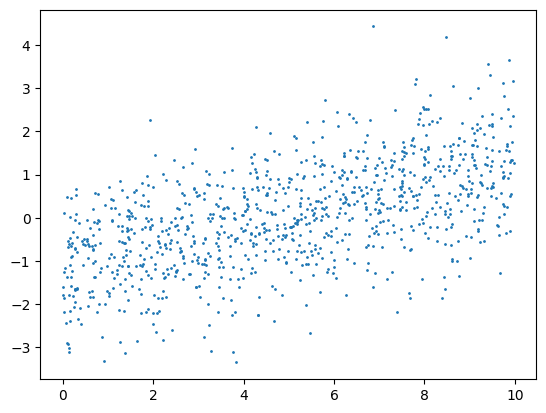

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X,y,s=1)

Parecem alguns dados lineares ruidosos, como esperávamos!

---

### Exercício 8: Regressão linear com o *scikit-learn*

Nesse exercício, pegaremos os dados sintéticos que acabamos de gerar e determinaremos uma linha de melhor ajuste, ou regressão linear, usando o *scikit-learn*. A primeira etapa é importar uma classe de modelo de regressão linear do *scikit-learn* e criar um objeto a partir dela. A importação é semelhante à da classe *LogisticRegression* que importamos anteriormente. Como em qualquer classe de modelo, você deve observar todas as opções padrão. Repare que, nesse caso, para uma regressão linear, não há tantas opções a serem especificadas: você pode usar os padrões para esse exercício. As configurações padrão incluem *fit_intercept=True*, significando que o modelo de regressão terá um termo para a interceptação. Isso é, sem dúvida, apropriado, já que adicionamos uma interceptação aos dados sintéticos. Execute as etapas a seguir para fazer o exercício:

##### 1. Execute este código para importar a classe de modelo de regressão linear e instanciá-la:

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg

LinearRegression()

Agora podemos ajustar o modelo usando nossos dados sintéticos, lembrando-nos de redimensionar o array de características, como fizemos anteriormente para que as amostras fiquem ao longo da primeira dimensão. Após ajustar o modelo de regressão linear, examinaremos  *lin_reg.intercept_*, que contém a interceptação do modelo ajustado, como era de se esperar, e *lin_reg.coef_*, que contém a inclinação.

##### 2. Execute este código para ajustar o modelo e examinar os coeficientes:

In [5]:
lin_reg.fit(X.reshape(-1,1), y)
print(f'Intercepto: {lin_reg.intercept_}')
print(f'Coeficiente de inclinação: {lin_reg.coef_}')

Intercepto: -1.1612566002825888
Coeficiente de inclinação: [0.24002588]


Podemos ver novamente que ajustar um modelo no scikit-learn, após os dados estarem preparados e as opções do modelo terem sido definidas, é um processo trivial. Isso ocorre porque o usuário não precisa fazer todo o trabalho algorítmico de determinar os parâmetros do modelo. Discutiremos alguns desses detalhes posteriormente no caso do modelo de regressão logística que usaremos nos dados do estudo de caso.

***E quanto à inclinação e à interceptação de nosso modelo ajustado?***

Esses números estão bem próximos da inclinação e da interceptação que indicamos ao criar o modelo. No entanto, devido ao ruído aleatório, são apenas aproximações.

Finalmente podemos usar o modelo para fazer previsões de valores das características. Aqui faremos isso empregando os mesmos dados utilizados no ajuste do modelo: o array de características, *X*. Capturaremos a saìda com uma variável chamada *y_pred*: esse caso é muito parecido com o anterior, só que agora estamos inserindo a saída do método *.predict* em uma variável.

##### 3. Execute este código para fazer previsões:

In [6]:
y_pred = lin_reg.predict(X.reshape(-1,1))

Podemos exibir as previsões, *y_pred*, da característica *X* como uma plotagem linear sobre a plotagem dispersa dos dados da característica e da resposta como fizemos na *Etapa 4*. Aqui repetimos a *Etapa 4*, com o acréscimo de *plt.plot*, que produz uma plotagem linear por padrão, para plotar os valores da característica e da resposta prevista pelo modelo. Observe que após os dados *X* e *y* inserimos 'r' em nossa chamada a *plt.plot*. Esse argumento de palavra-chave dá à linha a cor vermelha e faz parte de uma sintaxe abreviada para a formatação da ploteagem.

##### 4. Esse código pode ser usado para plotar os dados brutos e as previsões do modelo ajustado feitas para estes dados:

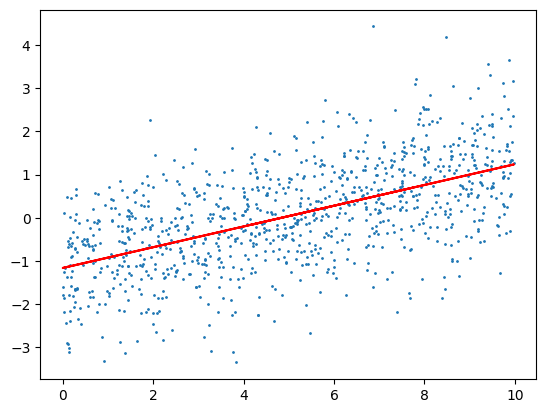

In [7]:
plt.scatter(X, y, s=1)
plt.plot(X, y_pred, 'r')

A plotagem exibe como seria a linha de melhor ajuste para os dados, como esperávamos.

Nesse exercício, ao contrário de quando chamamos *.predict* com a regressão logística, fizemos previsões para os mesmos dados *X* que usamos para treinar o modelo. Essa é uma diferença importante. Enquanto no caso atual estamos vendo como o modelo "ajusta" os mesmos dados com os quais foi treinado, anteriormente examinamos previsões do modelo para dados novos e deconhecidos. Em machine learning, geralmente o que nos interessa são os recursos preditivos: queremos modelos que nos ajudem a saber os possíveis resultados de futuros cenários. No entanto, no fim das contas as previsões tanto dos **dados de treinamento** usados para ajustar o modelo, quanto dos **dados de teste**, que não foram usados no ajuste, são importantes para entendermos o funcionamento do modelo. Formalizaremos essas noções posteriormente no *Capítulo 4, O trade-off entre viés e variância* quando discutirmos o **trade-off entre viés e variância**.

---

##### Dividindo os dados: conjuntos de treinamento e de teste

Usaremos a conveniente funcionalidade *train_test_split* do *scikit-learn* para dividir os dados de modo que 80% sejam usados para treinamento e 20% sejam reservados para teste. Esses percentuais são uma maneira comum de fazer a divisão; em geral, devemos ter dados de treinamento suficientes para permitir que o algoritmo "aprenda" adequadamente a partir de uma amostra de dados representativa. No entanto, os percentuais não são rígidos. Se você tiver um número muito grande de amostras, talvez não precise de um percentual tão alto de dados de treinamento, já que poderá vhegar a um conjunto de treinamento bastante extenso e representativo com um percentual mais baixo. Recomendamos que faça testes com diferentes tamanhos e veja o efeito. Além disso, lembre-se de que cada problema é diferente no que diz respeito a quantos dados são necessários para o treinamento efetivo de um modelo. Não há uma regre rígida parar o dimensionamento dos conjuntos de treinamento e teste. Considere o código mostrado no fragmento a seguir:

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('chapter_1_cleaned_data.csv')
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24)

Observe no teste anterior que definimos *test_size* como 0.2, ou 20%. O tamanho dos dados de treinamento será definido automaticamente com o restante, 80%. Ao fazer a divisão de treinamento/testte, também definimos o parâmetro *random_state*, que é um seed de número aleatório. O uso desse parâmetro permite uma divisão de treinamento/teste consistente entre as execuções do notebook. Caso contrário, o procedimento de divisão aleatória selecionaria um percentual de 20% dos dados de teste diferente a cada vez que o código fosse executado.

---

### Treinando e fazendo uma previsão do modelo

Agora daremos prosseguimento e ajustaremos um exemplo de modelo para ilustrar métricas de classificação binária. Continuaremos a usar uma regressão logística com opções quase padrão, selecionando as mesmas opções que demonstramos no *Capítulo 1, Exploração e limpeza de dados*:

In [9]:
from sklearn.linear_model import LogisticRegression

exampĺe_lr = LogisticRegression(C=0.1, solver= 'liblinear')

Treinaremos então o modelo, como era de se esperar, usando os dados rotulados de nosso conjunto de treinamento. Em seguida, usaremos imediatamente o modelo treinado para fazer previsões para as características das amostras do conjunto reservado para teste:

In [10]:
exampĺe_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [11]:
y_pred = exampĺe_lr.predict(X_test)

Armazenamos os rótulos do conjunto de teste previstos pelo modelo em uma variável chamada *y_pred*

---

### Exercício 9: Calculando as taxas de verdadeiros e falsos positivos e negativos e a matriz de confusão em Python

NEste exercício, usaremos os dados de teste e as previsões do modelo de regressão logística que criarmos anteriormente, utilizando apenas a característica `EDUCATION`. Ilustraremos como calcular manualmente as taxas de verdadeiros e falsos positivos e negativos da matriz de confusão. Em seguida, mostraremos uma maneira rápida de calcular uma matriz de confusão com o *scikit-learn*. Execute as etapas a seguir para fazer o exercício.

##### 1. Execute este código para calcular o número de amostras positivas:

In [12]:
P = sum(y_test)
P

1155

Agora precisamos do número de verdadeiros positivos. São as amostras que o rótulo verdadeiro é 1 e a previsão também é 1. Podemos identificá-las com uma máscara lógica para as amostras que forem positivas (y_test==1) **E** (& é o operador lógico **AND** [E, em português] em Python) tiverem uma previsão positiva (y_pred==1)

##### 2. Use este código para calcular o número de verdadeiros positivos:

In [13]:
TP = sum( (y_test==1) & (y_pred==1) )
TP

0

A taxa de verdadeiros positivos é a proporção de verdadeiros positivos da classe positiva.

##### 3. Execute o código a seguir para obter a taxa de verdadeiros positivos:

In [14]:
TPR = TP/P
TPR

0.0

Da mesma forma, podemos identificar os falsos negativos

##### 4. Calcule o número de falsos negativos com este código:

In [15]:
FN = sum( (y_test==1) & (y_pred==0) )
FN

1155

Também queremos a taxa de falsos negativos.

##### 5. Calcule a taxa de falsos negativos com:

In [16]:
FNR = FN/P
FNR

1.0

***O que descobrimos com as taxas de verdadeiros positivos e falsos negativos?***

Primeiro confirmamos que sua soma é 1. Esse fato é fácil de ver porque a TPR = 0 e a FPR = 1. O que isso nos diz sobre nosso modelo? No conjunto de teste, pelo menos as amostras positivas, na verdade o modelo agiu como um modelo nulo de classe majoritária. Todas as amostras positivas foram previstas como negativas, logo, nenhuma delas foi prevista corretamente.

##### 6. Calcularemos a TNR e a FPR de nossos dados de teste. Já que esses cálculos são muito semelhantes aos que examinamos anteriormente, vamos exibi-los de uma só vez e demonstraremos uma nova função Python:

In [17]:
N = sum(y_test==0)
N

4178

In [18]:
TN = sum( (y_test==0) & (y_pred==0) )
TN

4178

In [19]:
FP = sum( (y_test==0) & (y_pred==1) )
FP

0

In [20]:
TNR = TN/N
FPR = FP/N
print('A taxa de verdadeiros negativos é {} e a taxa de falsos positivos é {}'.format(TNR, FPR))

A taxa de verdadeiros negativos é 1.0 e a taxa de falsos positivos é 0.0


Além de calcular a TNR e a FPR de maneira semelhante a como fizemos com a TPR e a FNR, demonstraremos a função *print* do Python junto com o método *.format* para strings, que permite a substituição de variáveis em locais marcados com chaves (*{}*). Há várias opções para a formatação de números, como a inclusão de uma quantidade específica de casas decimais.

O que aprendemos aqui? Na verdade, nosso modelo se comporta exatamente como o modelo nulo de classe majoritária para todas as amostras, tanto positivas quanto negativas. É claro que precisaremos de um modelo melhor.

Embora tenhamos calculado manualmente todas as entradas da matriz de confusão nesse exercício, no *scikit-learn* há uma maneira rápida de fazer isso. Observe que, no *scikit-learn*, a classe verdadeira fica ao longo do eixo vertical e a classe prevista fica ao longo do eixo horizontal da matriz de confusão, como apresentamos anteriormente.

##### 7. Crie uma matriz de confusão no *scikit-learn* com este código:

In [21]:
from sklearn import metrics

metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

Todas as informações necessárias para o cálculo da TPR, FNR, TNR e FPR estão contidas na matriz de confusão. Repare também que há várias outras métricas de classificação que podem ser derivadas da matriz de confusão. Na verdade, algumas delas são sinônimas das que já examinamos aqui. Por exemplo, a TPR também é chamada de **recall** e **sensibilidade**. Além do recall, outra métrica que é com frequência usada para a classificação binária é a **precisão**: trata-se da proporção de previsões positivas que estão corretas (em vez da proporção de amostras positivas que foram prevists corretamente). Ganharemos mais experiência no uso da precisão na atividade deste capítulo.

---

### Exercício 10: Obtendo probabilidades previstas a partir de um modelo de regressão logística

No exercício a seguir, nos familiaremos com as probabilidades previstas da regressão logístiva e veremos como obtê-las a partir de um modelo do *scikit-learn*.

Podemos começar a descobrir probabilidades previstas examinando melhor os métodos disponíveis para nós no objetodo de modelo de regressão logístiva que treinamos neste capítulo. Lembre-se de que antes, uma vez treinado o modelo, podíamos fazer previsões binárias usando os valores das características de novas amostras, passando esses valores para o método *.predict* do modelo treinado. Essas são previsões feitas para a suposição de um limite igual a 0.5.

No entanto, podemos acessar diretamente as probabilidades previstas dessas amostras, usando o método *.predict_proba*. Execute as etapas a seguir para fazer o exercício:

##### 1. Obtenha as probabilidades previstas para as amostras de teste usando este código:

In [22]:
y_pred_proba = exampĺe_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

Podemos ver na saída desse código, armazenada em *y_pred_proba*, que há duas colunas. Isso ocorre porque há duas classes em nosso problema de classificação: negativa e positiva. Supondo que os rótulos negativos sejam codificados como 0 e os positivos como 1, como o são em nossos dados, o *scikit-learn* considerará a probabilidade de associação de classe negativa como a primeira coluna e a de associação de classe positiva como a segunda coluna.

Pela nossa discussão das probabilidades, podemos deduzier que a soma das probabilidades das duas classes é igual a 1 para cada amostra. Confirmaremos isso.

Primeiro, podemos usar *np.sum* na primeira dimensão (colunas) para calcular a soma das probabilidades de cada amostra.

##### 2. Calcule a soma das probabilidades previstas para cada amostra com este código:

In [23]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

Certamente parece que temos apenas 1s! Devemos verificar se o resultado tem a mesma forma do array de rótulos de dados de teste.

##### 3. Verifique a forma do array com este código:

In [24]:
prob_sum.shape

(5333,)

Ótimo; essa é a forma esperada. Agora verificaremos se todos os valores são iguais a 1. Usaremos *np.unique* para exibir os elementos exclusivos do array. Esse método é semelhante à palavra-chave *DISTINCT* do SQL. Se todas as somas de probabilidades forem realmente iguais a 1, deve haver apenas 1 elemento exclusivo no array de probabilidades: 1.

##### 4. Exiba todos os elementos exclusivos do array com este código:

In [25]:
np.unique(prob_sum)

array([1.])

Após confirmar nossa dedução sobre as probabilidades previstas, já que a soma das probabilidades das classes é 1, é suficiente considferar apenas a segunda coluna, a probabilidade prevista da associação de classe positiva. Vamos capturá-la em um array.

##### 5. Execute este código para inserir a segunda coluna do array de probabilidades previstas (probabilidade prevista de associação de classe positiva) em um array:

In [26]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

Qual seria a aparência dessas probabilidades? Uma maneira de descobrir, e um bom diagnóstico para a saída do modelo, é plotar as probabilidades previstas. Um histograma seria uma maneira natural de fazermos isso. Podemos usar diretamente a função de histogramas do *matplotlib*, *hist()*, para criá-lo. Observe que, se você executar uma célula que tenha apenas a função de histograma, a saída do *NumPy* será retornada antes da plotagem. Isso inclui o npúmero de amostras de cada bin e os locais das bordas dos bins.

##### 6. execute este código para ver a saída da função de histograma e uma plotagem não formatada (não mostrada):

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

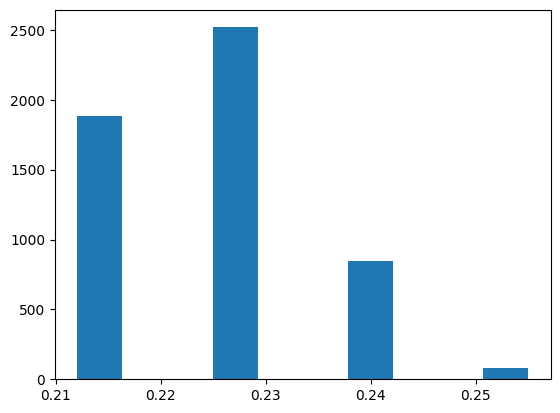

In [27]:
plt.hist(pos_proba)

Essas informações podem ser úteis e também poderiam ser obtidas diretamente a partir da função *np.histogram()*. No entanto, aqui estamos mais interessados na plotagem, logo, ajustaremos o tamanho da fonte e adicionaremos alguns rótulos de eixos.

##### 7. Execute este código para ver a plotagem formatada do histograma das probabilidades previstas:

Text(0.5, 1.0, 'Figura 2.42 - Plotagem do histograma das probabilidades previstas')

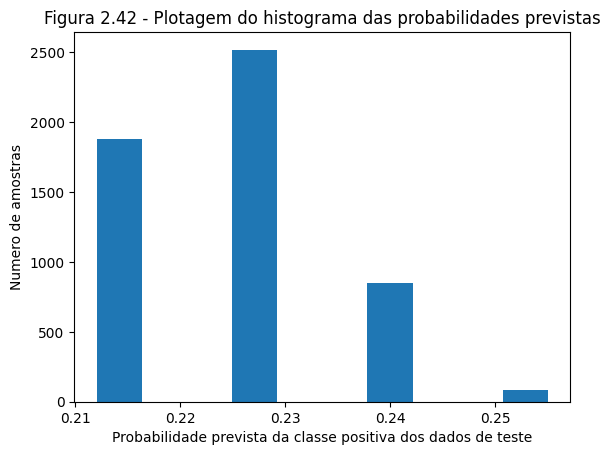

In [28]:
plt.hist(pos_proba)
plt.xlabel('Probabilidade prevista da classe positiva dos dados de teste')
plt.ylabel('Numero de amostras')
plt.title('Figura 2.42 - Plotagem do histograma das probabilidades previstas')

Observe que há apenas quatro bins com amostras no histograma de probabilidades e eles estão bem distantes uns dos outros. Isso ocorre porque há somente quatro valores exclusivos para a característica `EDUCATION`, que é a única característica de nosso exemplo de modelo.

Observe também que todas as probabilidades previstas estão abaixo de 0.5. É por isso que cada amostra foi prevista como negativa, pelo uso do limite 0.5. Podemos deduzir que, se definíssemos nosso limite abaixo de 0.5, obeteríamos resultados diferentes. Por exemplo, se definíssemos o limite como 0.25, todas as amostas do bin menos da extrema direita da *Figura 2.42* seriam classidas como positivas, já que a probabilidade prevista para todas elas estaria acima de 0.25. Seria informativo para nós se pudéssemos visualizar quantas dessas amostras tinham realmente rótulos positivos. Em seguida, poderíamos ver se mover nosso limite para baixo até 0.25 melhoraria o desempenho de nosso classificador pela classificação das amostras do bin da extrema direita como positivas.

Na verdade, podemos visualizar isso facilmente, usando um **histograma empilhado**. Ele será muito parecido com o histograma da *Figura 2.42*, exceto pelo fato de as amostras negativas e positivas terem cores diferentes. Em primeiro lugar, precisamos distinguir as amostras positivas das negativas nas probabilidades previstas. Podemos fazer isso indexando nosso array de probabilidades previstas com máscaras lógicas; primeiro obteremos as amostras positivas, em que *y_test == 1* e, em seguida, obteremos as negativas, em que *y_test == 0*.

##### 8. Isole as probabilidades previstas das amostras positivas e negativas com este código:

In [29]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Agora queremos plotar essas probabilidades como um histograma empilhado. O código é semelhante ao do histograma que criamos anteriormente, exceto por passarmos uma lista dos arrays a serem plotados, que são os arrays de probabilidades de amostras positivas e negativas que acabamos de criar e uma palavra-chave indicando que queremos que as barras sejam empilhadas em vez de plotadas lado a lado. Também criaremos uma legenda para que as cores sejam claramente identificáveis na pltagem.

##### 9. Plote um histograma empilhado com o código a seguir:

Text(0, 0.5, 'Número de amostras')

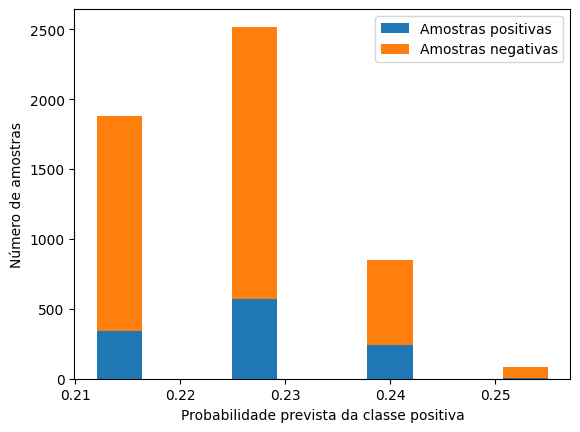

In [30]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Amostras positivas', 'Amostras negativas'])
plt.xlabel('Probabilidade prevista da classe positiva')
plt.ylabel('Número de amostras')

A plotagem mostra o rótulo verdadeiro das amostras para cada probabilidade prevista. Agora podemos considerar qual seria o efeito de baixarmos o limite para 0.25. Pare um pouco para pensar no que isso significaria, lembrando-se de que qualquer amostra com probabilidade prevista igual ou acima do limite seria classificada como positiva.

Já que quase todas as amostras do bin menor da direita na *Figura 2.42* são negativas, se diminuíssemos o limite para 0.25, elas seriam classificadas erroneamente como amostras positivas e aumentaríamos nossa taxa de falsos positivos. Ao mesmo tempo, ainda não teríamos consegui classificar muitas amostar positivas corretamente, caso conseguíssemos classificar alguma, logo, a taxa de verdadeiros positivos aumentaria demais. Parece que fazer essa alteração diminui a acurácia do modelo.

---

### Atividade 2: Executando a regressão logística com uma nova características e criando uma curva precision-recall

Nesta atividade, você treinará uma regressão logística usando uma característica diferente de `EDUCATION`. Em seguida, avaliará graficamente o tradeoff entre precisão e recall, assim como calculará a área sob uma curva precision-recall. Você também calculará a ROC AUC nos conjuntos tanto de treinamento quanto de teste e os comparará.

Execute as etapas a seguir para concluir a atividade:

##### 1. Use o método *train_test_split* do *scikit-learn* para criar um novo conjunto de dados de treinamento e de teste. Dessa vez, em vez de `EDUCATION`, use `LIMITBAL`: o limite de crédito da conta.

In [31]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24)

Observe que criamos novas divisões de treinamento e teste, com novos nomes de variáveis

##### 2. Treine um modelo de regressão logística usando os dados de treinamento provenientes da divisão.

In [32]:
exampĺe_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, solver='liblinear')

Reutilizamos o mesmo objeto de modelo, *example_lr*. Podemos **retreinar** esse objeto para que aprenda o relacionamento entre essa nova característica e a resposta. Poderísamos até mesmo testar uma divisão de treinamento/teste diferente, se quiséssemos, sem criar um novo objeto de modelo. O objeto de modelo existente foi atualizado **in loco**.

##### 3. Crie o array de probabilidades previstas para os dados de teste.

In [33]:
y_test_2_pred_proba = exampĺe_lr.predict_proba(X_test_2)

##### 4. Calcule a ROC AUC usando as probabilidades previstas e os rótulos verdadeiros dos dados de teste. Compare o resultado com a ROC AUC da característica `EDUCATION`.

In [34]:
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])

0.6201990844642832

Observe que indexamos o array de probabilidades previstas para obter a da classe positiva da segunda coluna. O que podemos ver se compararmos com a ROC AUC da regressão logística `EDUCATION`? A AUC é mais alta. Isso pode estar ocorrendo porque agora estamos usando uma característica que tem algo a ver com o status financeiro da conta (limite de crédito) para prever outra coisa relacionada ao status financeiro (se ela vai ou não ficar inadimplente), em vez de usar algo menos diretamente relacionado a finanças.

##### 5. Plote a curva ROC.

Text(0.5, 1.0, 'Curva ROC para regressão logística com a característica LIMIT_BAL')

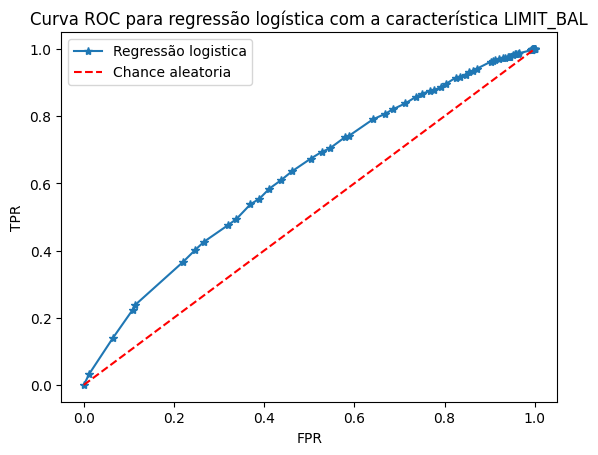

In [35]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_test_2_pred_proba[:,1])

plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Regressão logistica', 'Chance aleatoria'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC para regressão logística com a característica LIMIT_BAL')

Isso parece mais com a curva ROC que gostaríamos de ver: está mais distante da linha de chance aleatória que o modelo que usa apenas `EDUCATION`. Observe também que a variação nos pares de taxas de verdadeiros e falsos positivos é um pouco mais suave no intervalo de limites, o que reflete o maior número de diferentes valores da característica `LIMIT_BAL`.

##### 6. Calcule os dados da **curva precision-recall** baseando-se nos dados de teste e usando a funcionalidade do *scikit-learn*.

In [36]:
precision, recall, thresh_3 = metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])

##### 7. Plote a curva precision-recall usando o *matplotlib*

(0.0, 1.0)

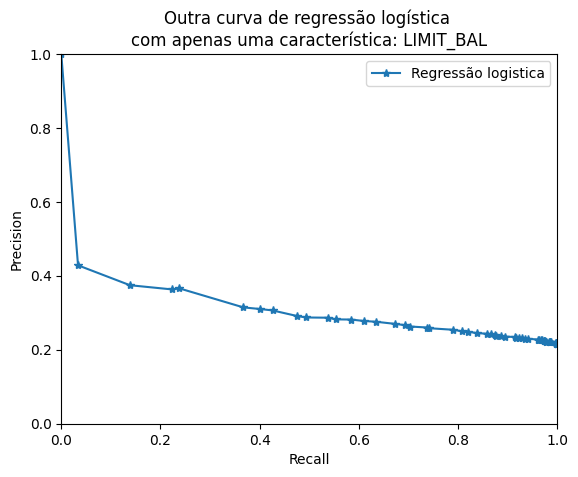

In [37]:
plt.plot(recall, precision, '*-')
plt.legend(['Regressão logistica', 'Chance aleatoria'])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Outra curva de regressão logística \ncom apenas uma característica: LIMIT_BAL')
plt.xlim([0,1])
plt.ylim([0,1])

##### 8. Use o *scikit-learn* para calcular a área sob a curva precision-recall.

In [38]:
metrics.auc(recall, precision)

0.31566964427378624

Vimos que a curva precision-recall mostra que geralmente a precisão é bastante baixa para esse modelo; para quase todo o intervalo de limites, a precisão, ou a parte das classificações positivas que está correta, é menos da metade. Podemos calcular a área sob a curva precision-recall como uma maneira de comparar esse classifcador com outros modelos ou conjuntos de características que possamos vir a considerar.

O *scikit-learn* oferece a funcionalidade de cálculo de uma área sob a curva de qualquer conjunto de dados x-y, usando a regra trapezoidal, da qual você deve se lembrar pela integral: *metrics.auc*. Usamos essa funcionalidade para obter a área sob a curva precision-recall

##### 9. Agora recalcule a ROC AUC, mas, dessa vez, faça-o para os dados de treinamento. Em que esse cálculo é diferente, conceitual e quatitativamente, do que fizemos antes?

In [39]:
y_train_2_pred_proba = exampĺe_lr.predict_proba(X_train_2)
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,1])

0.6182918113358344

Quantitativamente, podemos ver que essa AUX não é tão diferente da ROC AUC dos dados de teste que calculamos anteriormente. As duas são aproximadamente iguais a 0.62. Conceitualmente qual a diferença? Quando calculamos essa métrica com os dados de treinamento, estamos medindo a habilidade do modelo de prever os mesmos dados que o "ensinaram" como fazer previsões. Estamos vendo *com que eficácia o modelo ajusta os dados*. Se compararmos isso com uma métrica de dados de teste, estaremos comparando **pontuações de treinamento e teste**. Se houver alguma diferença nessa pontuação, que geralmente ocorre na forma de uma pontuação de treinamento mais alta que a de teste, isso indicará que, embora o modelo ajuste bem os dados, o modelo treinado não pode ser gerenalizado com bom resultado para novos dados desconhecidos.

Nesse caso, as pontuações de treinamento e teste são semelhantes, significando que o modelo se sai bem com dados fora da amostra assim como os mesmos dados usando no seu treinamento.